In [7]:
# from data import ChristmasImages
from model import Network

from PIL import Image
import glob
import os

from torchvision import transforms
import torch
import torchvision

from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchsummary import summary
import time

import torch, torchvision, matplotlib.pyplot as plt, sklearn, numpy as np, tqdm.notebook as tqdm, time, random
from IPython. display import clear_output

In [8]:
# def batch_mean_and_sd(path_to_images):

#     train_transforms = transforms.Compose([
#         transforms.Resize((128,128)),
#         transforms.RandomRotation(10),
#         transforms.ToTensor()
#     ])

#     #load the train and test data
#     image_data = ImageFolder(root = path_to_images ,transform = train_transforms)
    
#     loader = DataLoader(
#       image_data, 
#       batch_size = len(image_data), 
#       num_workers=1)
    
#     images, labels = next(iter(loader))
#     # shape of images = [b,c,w,h]
#     mean, std = images.mean([0,2,3]), images.std([0,2,3])
    
#     return mean,std

# train_data_path = os.path.join(os.getcwd(),"data/train")
# mean, std = batch_mean_and_sd(train_data_path)
# print("mean and std: \n", mean, std)

In [9]:
#mean and std for 128x128 and rot 10
mean = torch.tensor([0.4582, 0.4111, 0.3841])
std = torch.tensor([0.3154, 0.3114, 0.3196])

# mean and std for 224x224 and rot 10
# mean = torch.tensor([0.4581, 0.4110, 0.3839])
# std = torch.tensor([0.3192, 0.3152, 0.3232])


train_data_path = os.path.join(os.getcwd(),"data/train")

train_transforms = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

#load the train and test data
train_dataset = ImageFolder(root = train_data_path,transform = train_transforms)


len(train_dataset)

3726

In [10]:
# test_data_path = os.path.join(os.getcwd(),"data/val/")
# filenames = glob.glob(test_data_path+ "/*.png")

# test_images= []
# for filename in filenames:
#     im=Image.open(filename).convert('RGB')
#     im_resize = im.resize((224, 224))
#     convert_tensor = transforms.ToTensor()
#     im_tensor = convert_tensor(im_resize)
#     images_c_cookies.append(im_tensor)

In [11]:
batch_size = 32
val_size =int(0.2*len(train_dataset))
train_size = len(train_dataset)-val_size

train_data,val_data = random_split(train_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size, num_workers = 4, pin_memory = True)

Length of Train Data : 2981
Length of Validation Data : 745


In [12]:
print(len(train_dl))
print(len(val_dl))

94
24


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

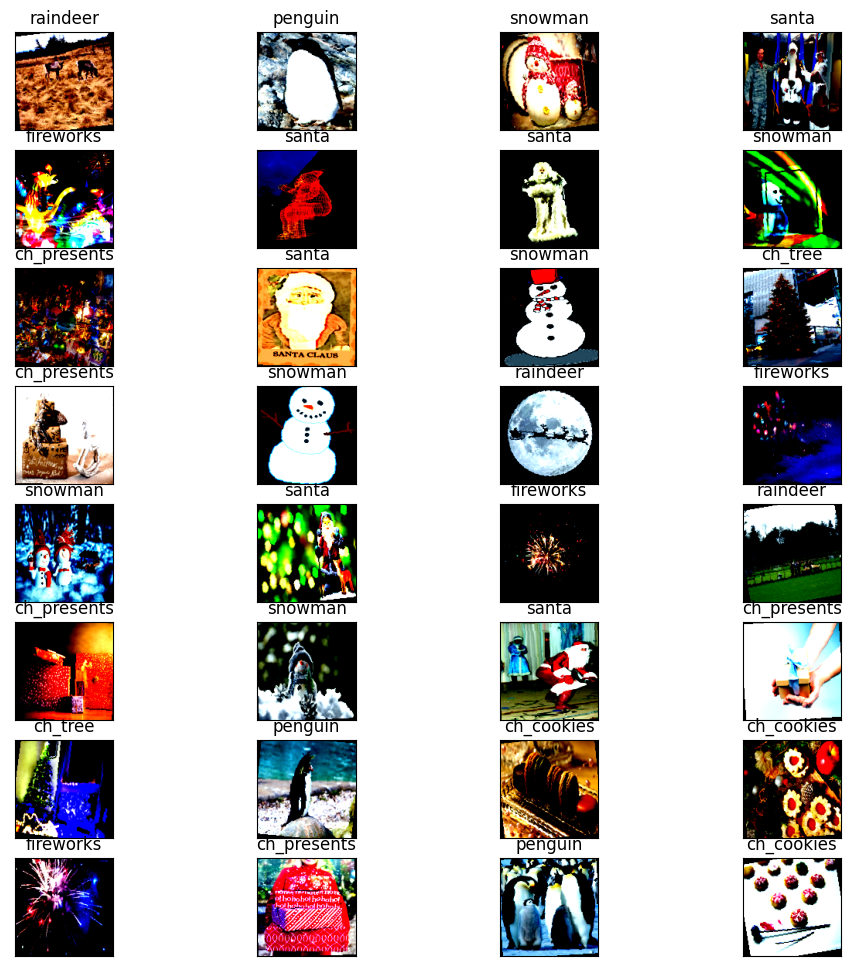

In [13]:
def show_batch(train_loader):
    #Define the image classes
    classes = ['ch_cookies', 'ch_presents', 'ch_tree', 'fireworks', 'penguin', 'raindeer', 'santa', 'snowman']

    #Obtain one batch of training images
    di = iter(train_loader)
    images, labels = next(di)
#     images = images.numpy() # convert images to numpy for display
    
    #Plot the images
    fig = plt.figure(figsize=(12, 12))

    for idx in np.arange(images.shape[0]):
        ax = fig.add_subplot(8, 4, idx+1, xticks=[], yticks=[])
        plt.imshow(images[idx].permute(1,2,0))
        ax.set_title(classes[labels[idx]])
        
show_batch(train_dl)

In [14]:
# test_data_path = os.path.join(os.getcwd(),"data/val/test")

# list_dir=[int(file.split(".")[0]) for file in os.listdir(test_data_path)]
# list_dir.sort()

# test_images= []
# for fname in list_dir:  
#     filename = test_data_path + '/' + str(fname)+".png"
#     im=Image.open(filename).convert('RGB')
#     im_resize = im.resize((128, 128))
#     convert_tensor = transforms.ToTensor()
#     im_tensor = convert_tensor(im_resize)
#     test_images.append(im_tensor)

In [15]:
# csv_data_path = os.path.join(os.getcwd(),"data/val")

# import pandas as pd

# df = pd.read_csv(csv_data_path +'/val.csv')
# # print(df)
# df = df.to_numpy()
# test_labels = df[:,1]
# print(test_labels)
# # print(df)

In [16]:
# classes = ['ch_cookies', 'ch_presents', 'ch_tree', 'fireworks', 'penguin', 'raindeer', 'santa', 'snowman']
# fig = plt.figure(figsize=(12, 12))
# for i in range(9):
#     ax = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
#     plt.imshow(test_images[i].permute(1,2,0))
#     ax.set_title(classes[test_labels[i]])

In [17]:
def save_state(network, optimizer, measures, name):
    torch.save({
        "net": network.state_dict(),
        "optimizer": optimizer.state_dict(),
#         "params": network._construct_pars,
        "measures": measures
    }, f"savestate_{name}.torch")

In [18]:
def load_state(name, network_fn, map_location):
    load = torch.load(f"savestate_{name}.torch", map_location=map_location)
    network = network_fn(**load["params"])
    network.load_state_dict(load["net"])
    return network, load["optimizer"], load["measures"]

In [19]:
def plot_perf(train:list, val:list , name:list, share_axis=False):
    assert len(train) == len(val) == len(name)
    
    f, host = plt.subplots(figsize=(8,5))
    handles = []
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    
    plt.xlabel("Epoch")
    plt.grid(linestyle="--")
    
    for i in range(len(train)):
        ax = plt.gca()
        if not share_axis:
            if i == 0:
                ax = host
            else:
                ax = host.twinx()
            ax.set_ylabel(name[i], c=colors[i])
            ax.tick_params(axis="y", colors=colors[i])
        
        handles += ax.plot(train[i], label=f"{name[i]}, train", c=colors[i])
        handles += ax.plot(val[i], label=f"{name[i]}, val", c=colors[i], linestyle="--")
    
    plt.legend(handles=handles, bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()

In [20]:
def get_device():
#     if torch.backends.mps.is_available():
#         device = 'mps'
    if torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)

cpu


In [21]:
def train_loop(network, dataloader_train, dataloader_val, optimizer=None, epochs=10, name="network"):
    # Optimizer
    print(network)
    summary(network,(3,128,128))
    network.to(device)
    if optimizer is None:
        optimizer = torch.optim.Adam(network.parameters(),lr=0.0001)
    loss = torch.nn.CrossEntropyLoss()

    # Measurements
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    time_start = time.time()

    # Training Loop
    for epoch in tqdm.trange(epochs):
        train_loss = 0
        val_loss = 0
        train_acc = 0
        val_acc = 0

        # 1. Train the network
        network.train()
        
        for x, y in dataloader_train:
            x=x.to(device)
            y=y.to(device)
            # delete previous gradient calculations
            optimizer.zero_grad()

            # predict class logits for each image in the batch
            y_pred = network(x)
            # compute the loss
            L = loss(y_pred, y)
            # compute gradients
            L.backward()
            # change parameters of the network
            optimizer.step()

            train_loss += L.item()
            train_acc += (y_pred.max(dim=1)[1] == y).sum().item()

        train_acc /= len(dataloader_train.dataset)
        train_loss /= len(dataloader_train.dataset)

        # 2. Validate the network
        network.eval()
        
        with torch.no_grad(): # we don't need gradients: speeds up computations
            for x, y in dataloader_val:
                x=x.to(device)
                y=y.to(device)
                # predict class logits for each image in the batch
                y_pred = network(x)
                # compute the loss
                L = loss(y_pred, y)

                val_loss += L.item()
                val_acc += (y_pred.max(dim=1)[1] == y).sum().item()

        # 3. Collect measurements
        val_acc /= len(dataloader_val.dataset)
        val_loss /= len(dataloader_val.dataset)

        train_losses += [train_loss]
        val_losses += [val_loss]
        train_accuracies += [train_acc]
        val_accuracies += [val_acc]
        
        # 4. Savestate
        save_state(
            network, optimizer,
            [train_losses, val_losses, train_accuracies, val_accuracies],
            f"{name}_last"
        )
        
        if max(val_accuracies) == val_acc:
            save_state(
                network, optimizer,
                [train_losses, val_losses, train_accuracies, val_accuracies],
                f"{name}_best"
            )

        # 5. Output
        clear_output(wait=True)

        print(f"[{epoch:>2}] Train loss: {train_loss:.5f}, Val loss: {val_loss:.5f}")
        print(f"[{epoch:>2}] Train accuracy: {train_acc:.3f}, Val accuracy: {val_acc:.3f}")
        print(f"[{epoch:>2}] Best train accuracy: {max(train_accuracies):.3f} @ {train_accuracies.index(max(train_accuracies))}")
        print(f"[{epoch:>2}] Best val accuracy: {max(val_accuracies):.3f} @ {val_accuracies.index(max(val_accuracies))}")
        time_past = time.time() - time_start
        time_per_epoch = time_past / (epoch+1)
        eta = (epochs-1-epoch) * time_per_epoch
        print(f"[{epoch:>2}] Time: {time_past:.1f}s, Time-per-Epoch: {time_per_epoch:.1f}s, eta: {eta:.1f}s")

        plot_perf(
            train = [train_losses, train_accuracies],
            val = [val_losses, val_accuracies],
            name = ["loss", "accuracy"]
        )
        
    return train_losses, val_losses, train_accuracies, val_accuracies, optimizer

[29] Train loss: 0.00422, Val loss: 0.04874
[29] Train accuracy: 0.960, Val accuracy: 0.623
[29] Best train accuracy: 0.991 @ 27
[29] Best val accuracy: 0.658 @ 26
[29] Time: 11794.2s, Time-per-Epoch: 393.1s, eta: 0.0s


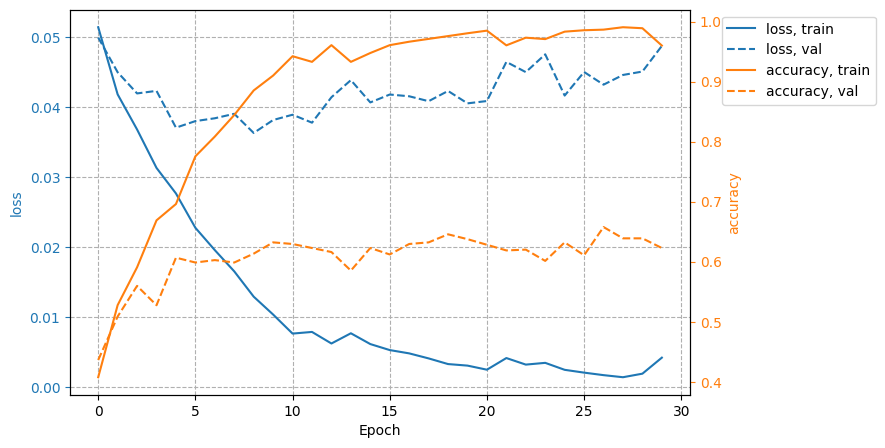

([0.05141165587614943,
  0.04182089792726345,
  0.03680454916859665,
  0.03131624905305675,
  0.027671060898847046,
  0.022765673714490273,
  0.019575960911667935,
  0.016542322711231162,
  0.012929114448428354,
  0.010376220514653554,
  0.007656625103666574,
  0.007893184106828223,
  0.0062415090154297834,
  0.007701722688220644,
  0.006159089113273544,
  0.005301718748493588,
  0.004830222558111442,
  0.0041120542648833535,
  0.0033034508624849843,
  0.003083409873361917,
  0.0024985279044381966,
  0.004163706958223933,
  0.00322697793453162,
  0.003477325259324529,
  0.002481483224828105,
  0.002080266597296159,
  0.0017218906154336845,
  0.0014247064530557032,
  0.001931259048373477,
  0.004218235691894984],
 [0.04994539910514883,
  0.04497875927278659,
  0.04195565977352578,
  0.04232236826979874,
  0.03706806002047238,
  0.038003275138419744,
  0.03840858224254327,
  0.03904669564842378,
  0.036309526430680444,
  0.038158314100047885,
  0.038914586553637616,
  0.03777889445324072

In [22]:
train_loop(Network(),train_dl, val_dl, optimizer=None, epochs=30, name="network")